# Function Generation for the Training of λ-Nets

## Specitication of Experiment Settings

In [1]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utilities.DecisionTree_BASIC import SDT
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from IPython.display import Image

import numpy as np
import torch
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

In [2]:
X, y = load_breast_cancer(return_X_y=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [3]:
X, y = load_iris(return_X_y=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
X, y = load_breast_cancer(return_X_y=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [5]:
X_train.shape

(381, 30)

In [6]:
y_test.shape

(188,)

In [7]:
print(X_train.shape[1])
print(int(max(y_train))+1)

30
2


In [8]:
depth = 3
beta = 1

In [9]:
tree = SDT(input_dim=X_train.shape[1], 
          output_dim=int(max(y_train))+1, 
          depth=depth,
          beta=beta,
          decision_sparsity=-1,
          use_cuda=False,
          verbosity=1)

In [10]:
tree.inner_nodes[0].weight

Parameter containing:
tensor([[ 0.1396,  0.1515, -0.0428,  0.1677, -0.0400,  0.0368, -0.0889,  0.1072,
          0.1609, -0.1339,  0.1587,  0.0342,  0.1349,  0.0247,  0.0880, -0.0258,
          0.1407,  0.0270, -0.0852,  0.0465, -0.0841, -0.0214, -0.0742,  0.1211,
         -0.1441, -0.0842, -0.0516, -0.1098,  0.0172, -0.1803],
        [ 0.1649, -0.1551,  0.1410,  0.0304, -0.0593,  0.1128,  0.0285,  0.1475,
          0.0200, -0.0576,  0.0491, -0.0495,  0.0768,  0.1630,  0.1055, -0.0798,
          0.1054,  0.0327,  0.0927, -0.1113, -0.1807, -0.0705, -0.1400,  0.1498,
          0.0526,  0.0756,  0.0577, -0.0032,  0.1429, -0.1297],
        [ 0.0115, -0.1246,  0.0563, -0.0629,  0.0559, -0.0380,  0.1514, -0.1082,
         -0.1089, -0.1089,  0.1642,  0.0608,  0.1757, -0.1507, -0.1811, -0.1428,
         -0.1228,  0.0739,  0.0654,  0.1517, -0.0943, -0.1245,  0.0969, -0.0738,
          0.1108, -0.0433,  0.1044, -0.1419, -0.0921,  0.0557],
        [ 0.0386, -0.0465,  0.1088,  0.1241, -0.1324, -0.

In [11]:
tree.inner_nodes[0].bias

Parameter containing:
tensor([ 0.1164,  0.0843, -0.1614, -0.1098, -0.0288,  0.1766,  0.0264],
       requires_grad=True)

In [12]:
tree.leaf_nodes.weight

Parameter containing:
tensor([[-0.0916,  0.1463, -0.1347, -0.2288,  0.2581, -0.1608, -0.0709, -0.3517],
        [ 0.2366,  0.2679,  0.1289, -0.2465, -0.3489, -0.2871,  0.2636,  0.1697]],
       requires_grad=True)

variable_name 3-0
parent_name 2-0
variable_name 3-1
parent_name 2-0
variable_name 3-2
parent_name 2-1
variable_name 3-3
parent_name 2-1
variable_name 3-4
parent_name 2-2
variable_name 3-5
parent_name 2-2
variable_name 3-6
parent_name 2-3
variable_name 3-7
parent_name 2-3


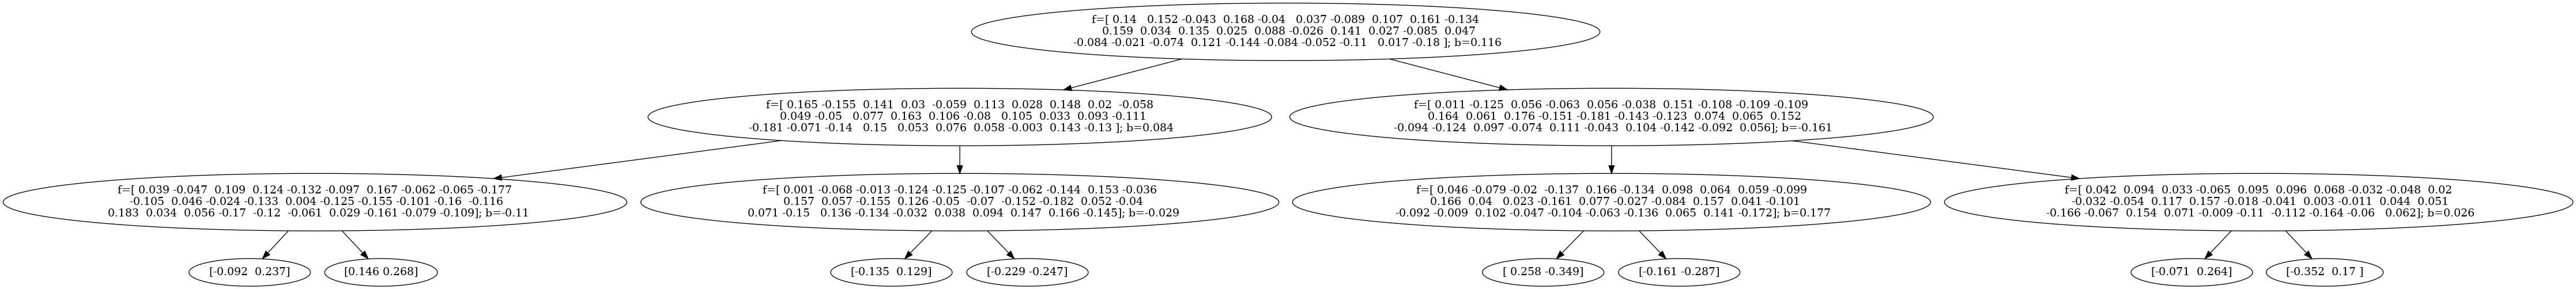

In [13]:
tree.plot_tree()

In [14]:
tree.fit(X_train[:], y_train[:], batch_size=32, epochs=100)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 00 | Loss: 0.69202 | Correct: 241/381
Epoch: 01 | Loss: 0.66862 | Correct: 309/381
Epoch: 02 | Loss: 0.61160 | Correct: 330/381
Epoch: 03 | Loss: 0.52838 | Correct: 343/381
Epoch: 04 | Loss: 0.45904 | Correct: 344/381
Epoch: 05 | Loss: 0.40014 | Correct: 347/381
Epoch: 06 | Loss: 0.35871 | Correct: 348/381
Epoch: 07 | Loss: 0.32957 | Correct: 348/381
Epoch: 08 | Loss: 0.30109 | Correct: 351/381
Epoch: 09 | Loss: 0.28180 | Correct: 352/381
Epoch: 10 | Loss: 0.26593 | Correct: 353/381
Epoch: 11 | Loss: 0.25272 | Correct: 354/381
Epoch: 12 | Loss: 0.23753 | Correct: 356/381
Epoch: 13 | Loss: 0.23018 | Correct: 356/381
Epoch: 14 | Loss: 0.21369 | Correct: 359/381
Epoch: 15 | Loss: 0.20453 | Correct: 360/381
Epoch: 16 | Loss: 0.19198 | Correct: 362/381
Epoch: 17 | Loss: 0.17592 | Correct: 365/381
Epoch: 18 | Loss: 0.16779 | Correct: 366/381
Epoch: 19 | Loss: 0.16813 | Correct: 365/381
Epoch: 20 | Loss: 0.16112 | Correct: 366/381
Epoch: 21 | Loss: 0.15386 | Correct: 367/381
Epoch: 22 

variable_name 3-0
parent_name 2-0
variable_name 3-1
parent_name 2-0
variable_name 3-2
parent_name 2-1
variable_name 3-3
parent_name 2-1
variable_name 3-4
parent_name 2-2
variable_name 3-5
parent_name 2-2
variable_name 3-6
parent_name 2-3
variable_name 3-7
parent_name 2-3


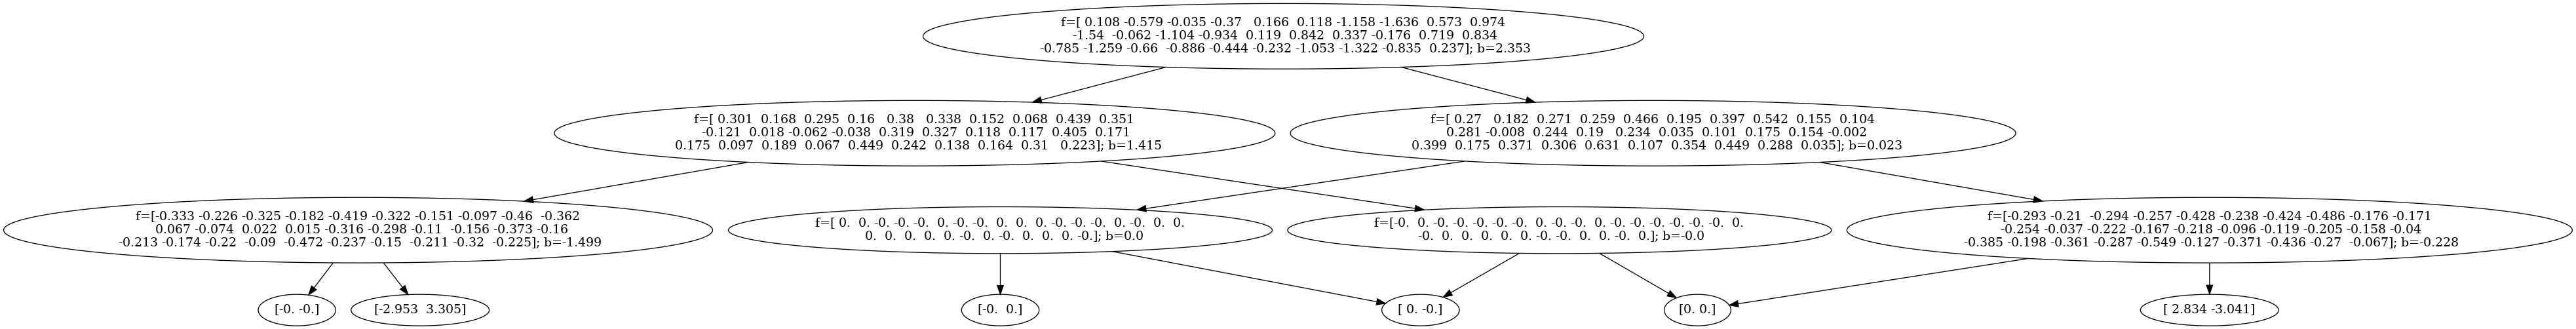

In [15]:
tree.plot_tree()

In [16]:
tree.evaluate(X_test, y_test)


Testing Accuracy: 183.0/188 (97.340%)



0.973404255319149

In [17]:
tree.inner_nodes[0].weight

Parameter containing:
tensor([[     0.1085,     -0.5787,     -0.0352,     -0.3702,      0.1657,
              0.1180,     -1.1584,     -1.6364,      0.5726,      0.9742,
             -1.5404,     -0.0616,     -1.1038,     -0.9338,      0.1193,
              0.8420,      0.3370,     -0.1764,      0.7185,      0.8338,
             -0.7845,     -1.2592,     -0.6600,     -0.8858,     -0.4436,
             -0.2318,     -1.0528,     -1.3216,     -0.8348,      0.2370],
        [     0.3010,      0.1679,      0.2953,      0.1597,      0.3796,
              0.3379,      0.1519,      0.0683,      0.4388,      0.3514,
             -0.1215,      0.0175,     -0.0619,     -0.0380,      0.3194,
              0.3274,      0.1176,      0.1171,      0.4045,      0.1708,
              0.1747,      0.0970,      0.1894,      0.0666,      0.4489,
              0.2420,      0.1380,      0.1636,      0.3104,      0.2231],
        [     0.2701,      0.1821,      0.2707,      0.2587,      0.4657,
              

In [18]:
tree.leaf_nodes.weight

Parameter containing:
tensor([[    -0.0000,     -2.9527,      0.0000,      0.0000,      0.0000,
              2.8341,      0.0000,     -0.0000],
        [    -0.0000,      3.3049,     -0.0000,      0.0000,      0.0000,
             -3.0414,     -0.0000,      0.0000]], requires_grad=True)

In [19]:
tree = SDT(input_dim=X_train.shape[1], 
          output_dim=int(max(y_train))+1, 
          depth=depth,
          beta=beta,
          decision_sparsity=1,
          use_cuda=False,
          verbosity=1)

In [20]:
tree.fit(X_train[:], y_train[:], batch_size=32, epochs=100)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 00 | Loss: 0.69184 | Correct: 265/381
Epoch: 01 | Loss: 0.68833 | Correct: 236/381
Epoch: 02 | Loss: 0.68309 | Correct: 236/381
Epoch: 03 | Loss: 0.67763 | Correct: 236/381
Epoch: 04 | Loss: 0.67269 | Correct: 236/381
Epoch: 05 | Loss: 0.66905 | Correct: 236/381
Epoch: 06 | Loss: 0.66697 | Correct: 236/381
Epoch: 07 | Loss: 0.66606 | Correct: 236/381
Epoch: 08 | Loss: 0.66569 | Correct: 236/381
Epoch: 09 | Loss: 0.66553 | Correct: 236/381
Epoch: 10 | Loss: 0.66545 | Correct: 236/381
Epoch: 11 | Loss: 0.66539 | Correct: 236/381
Epoch: 12 | Loss: 0.66535 | Correct: 236/381
Epoch: 13 | Loss: 0.66531 | Correct: 236/381
Epoch: 14 | Loss: 0.66527 | Correct: 236/381
Epoch: 15 | Loss: 0.66523 | Correct: 236/381
Epoch: 16 | Loss: 0.66519 | Correct: 236/381
Epoch: 17 | Loss: 0.66516 | Correct: 236/381
Epoch: 18 | Loss: 0.66512 | Correct: 236/381
Epoch: 19 | Loss: 0.66508 | Correct: 236/381
Epoch: 20 | Loss: 0.66505 | Correct: 236/381
Epoch: 21 | Loss: 0.66501 | Correct: 236/381
Epoch: 22 

variable_name 3-0
parent_name 2-0
variable_name 3-1
parent_name 2-0
variable_name 3-2
parent_name 2-1
variable_name 3-3
parent_name 2-1
variable_name 3-4
parent_name 2-2
variable_name 3-5
parent_name 2-2
variable_name 3-6
parent_name 2-3
variable_name 3-7
parent_name 2-3


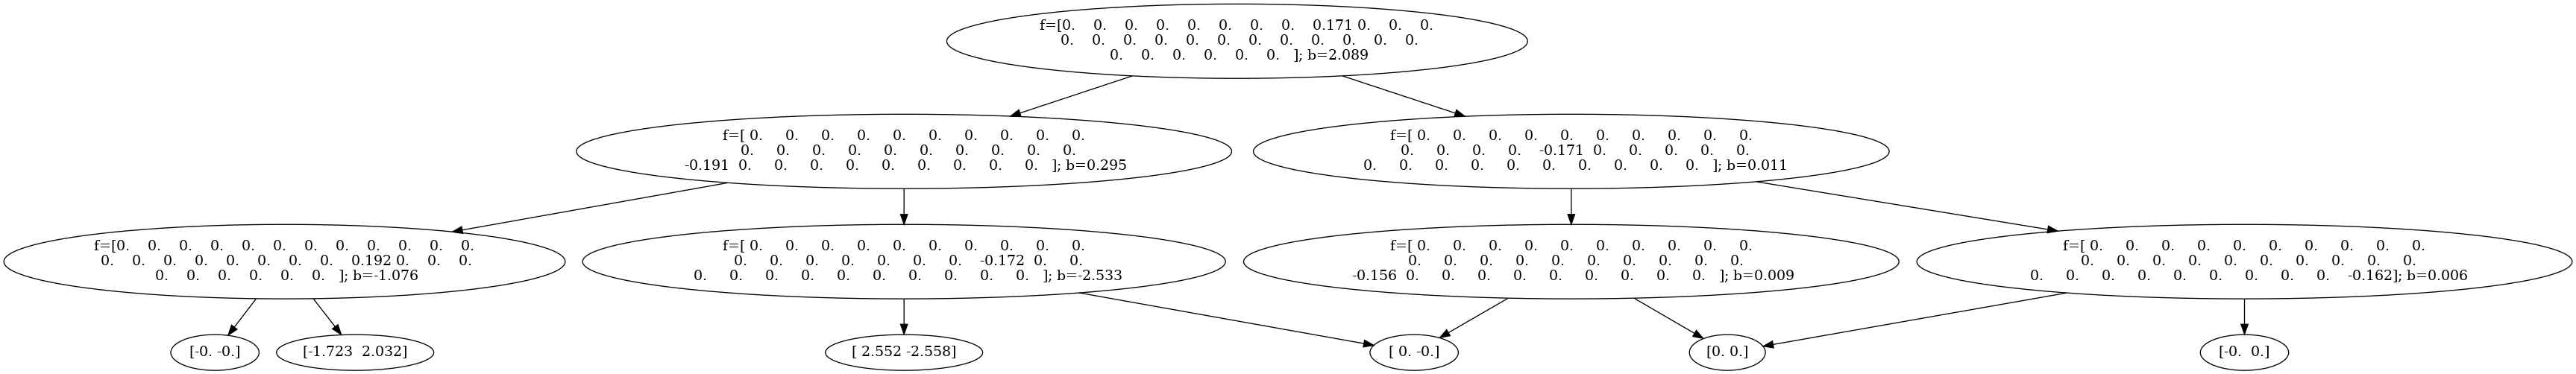

In [21]:
tree.plot_tree()

In [22]:
tree.evaluate(X_test, y_test)


Testing Accuracy: 179.0/188 (95.213%)



0.9521276595744681

In [23]:
tree.inner_nodes[0].weight

Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.1709,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000, -0.1907,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.1711,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.

In [24]:
tree.leaf_nodes.weight

Parameter containing:
tensor([[    -0.0000,     -1.7229,      0.0000,      2.5520,      0.0000,
             -0.0000,      0.0000,      0.0000],
        [    -0.0000,      2.0321,     -0.0000,     -2.5580,      0.0000,
              0.0000,     -0.0000,      0.0000]], requires_grad=True)

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=depth)

In [26]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
from sklearn.metrics import accuracy_score
y_pred =  tree.predict(X_test)

print('Accuracy :',  accuracy_score(y_test, y_pred))

Accuracy : 0.9521276595744681


[Text(167.4, 190.26, 'X[7] <= 0.255\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(83.7, 135.9, 'X[20] <= 0.317\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(41.85, 81.53999999999999, 'X[10] <= 0.186\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(20.925, 27.180000000000007, 'gini = 0.027\nsamples = 216\nvalue = [3, 213]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 0.219\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(146.475, 27.180000000000007, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(251.10000000000002, 135.9, 'X[22] <= 0.199\ngini = 0.182\nsamples = 148\nvalue = [133, 15]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 0.384\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Te

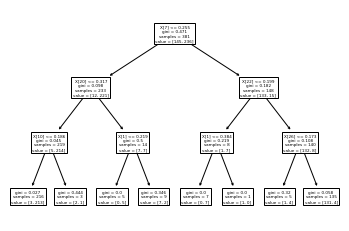

In [28]:
from sklearn import tree as sklearn_tree
sklearn_tree.plot_tree(tree) 

In [29]:
z

NameError: name 'z' is not defined

In [ ]:
tree = SDT(input_dim=X_train.shape[1], 
          output_dim=int(max(y_train))+1, 
          depth=2,
          beta=1,
          decision_sparsity=-1,
          use_cuda=False,
          verbosity=1)

In [ ]:
tree.inner_nodes[0].weight

In [ ]:
tree.evaluate(X_test, y_test)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2
tree.plot_tree()

In [ ]:
tree.predict([[0,0,0,-2]])

In [ ]:
value=2
feature_index = 3

In [ ]:
import tensorflow as tf

In [ ]:
prob1 = tf.math.sigmoid(value*tree.inner_nodes[0].weight[0][feature_index].detach().numpy()+tree.inner_nodes[0].bias[0].detach().numpy())*tf.math.sigmoid(value*tree.inner_nodes[0].weight[1][feature_index].detach().numpy()+tree.inner_nodes[0].bias[1].detach().numpy())
prob1

In [ ]:
prob2 = tf.math.sigmoid(value*tree.inner_nodes[0].weight[0][feature_index].detach().numpy()+tree.inner_nodes[0].bias[0].detach().numpy())*(1-tf.math.sigmoid(value*tree.inner_nodes[0].weight[1][feature_index].detach().numpy()+tree.inner_nodes[0].bias[1].detach().numpy()))
prob2

In [ ]:
prob3 = (1-tf.math.sigmoid(value*tree.inner_nodes[0].weight[0][feature_index].detach().numpy()+tree.inner_nodes[0].bias[0].detach().numpy()))*tf.math.sigmoid(value*tree.inner_nodes[0].weight[2][feature_index].detach().numpy()+tree.inner_nodes[0].bias[2].detach().numpy())
prob3

In [ ]:
prob4 = (1-tf.math.sigmoid(value*tree.inner_nodes[0].weight[0][feature_index].detach().numpy()+tree.inner_nodes[0].bias[0].detach().numpy()))*(1-tf.math.sigmoid(value*tree.inner_nodes[0].weight[2][feature_index].detach().numpy()+tree.inner_nodes[0].bias[2].detach().numpy()))
prob4

In [ ]:
o1 = prob1*tree.leaf_nodes.weight.T[0].detach().numpy()
o1

In [ ]:
o2 = prob2*tree.leaf_nodes.weight.T[1].detach().numpy()
o2

In [ ]:
o3 = prob3*tree.leaf_nodes.weight.T[2].detach().numpy()
o3

In [ ]:
o4 = prob4*tree.leaf_nodes.weight.T[3].detach().numpy()
o4

In [ ]:
tf.nn.softmax(tf.reduce_sum([o1, o2, o3, o4], axis=0))

In [ ]:
tf.nn.softmax(o1)

In [ ]:
tree.inner_nodes[0].weight

In [ ]:
tf.math.sigmoid(2*1.115+0.014)

In [ ]:
tf.math.sigmoid(2*1.01-0.142)

In [ ]:
%autoreload 2

parameters = tree.to_array()
print(parameters)